#### This notebook is for a Kaggle competition - ML Olympiad - Predicting Earthquake Damage
##### Goal of the competition is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal based on aspects of building location and construction .
##### Link - https://www.kaggle.com/competitions/ml-olympiad-predicting-earthquake-damage/overview

##### Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df

building_id  count_floors_pre_eq  age  area_percentage  \
0               0                    3    0               11   
1               1                    1    3               11   
2               2                    2    0               12   
3               3                    1    0               11   
4               4                    2    4               25   
...           ...                  ...  ...              ...   
3995         3995                    2   36               12   
3996         3996                    1   16                6   
3997         3997                    2    1                7   
3998         3998                    2    0                7   
3999         3999                    3    0                6   

      height_percentage land_surface_condition foundation_type roof_type  \
0                     4                      o               r         x   
1                     9                      t               i         x   
2                     6                      t               i         x   
3                     3                      o               r         n   
4                    10                      t               i         n   
...                 ...                    ...             ...       ...   
3995                  4                      t               r         n   
3996                  2                      t               r         n   
3997                  5                      t               u         n   
3998                  5                      t               r         q   
3999                  6                      t               u         q   

     ground_floor_type other_floor_type  ... has_secondary_use_hotel  \
0                    f                q  ...                       0   
1                    v                s  ...                       0   
2                    v                s  ...                       0   
3                    v                j  ...                       0   
4                    f                x  ...                       1   
...                ...              ...  ...                     ...   
3995                 f                x  ...                       0   
3996                 x                j  ...                       0   
3997                 f                q  ...                       0   
3998                 x                x  ...                       0   
3999                 f                s  ...                       0   

     has_secondary_use_rental  has_secondary_use_institution  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
...                       ...                            ...   
3995                        0                              0   
3996                        0                              0   
3997                        0                              0   
3998                        0                              0   
3999                        0                              0   

      has_secondary_use_school  has_secondary_use_industry  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
3995                         0                           0   
3996                         0                           0   
3997                         0                           0   
3998                         0                           0   
3999    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             4000 non-null   int64 
 1   count_floors_pre_eq                     4000 non-null   int64 
 2   age                                     4000 non-null   int64 
 3   area_percentage                         4000 non-null   int64 
 4   height_percentage                       4000 non-null   int64 
 5   land_surface_condition                  4000 non-null   object
 6   foundation_type                         4000 non-null   object
 7   roof_type                               4000 non-null   object
 8   ground_floor_type                       4000 non-null   object
 9   other_floor_type                        4000 non-null   object
 10  position                                4000 non-null   object
 11  plan

In [4]:
df['damage_grade'].unique()

array([2, 1, 3], dtype=int64)

In [5]:
df.columns

Index(['building_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_second

In [6]:
df.drop(columns=['building_id'], inplace=True)


In [7]:
df

count_floors_pre_eq  age  area_percentage  height_percentage  \
0                       3    0               11                  4   
1                       1    3               11                  9   
2                       2    0               12                  6   
3                       1    0               11                  3   
4                       2    4               25                 10   
...                   ...  ...              ...                ...   
3995                    2   36               12                  4   
3996                    1   16                6                  2   
3997                    2    1                7                  5   
3998                    2    0                7                  5   
3999                    3    0                6                  6   

     land_surface_condition foundation_type roof_type ground_floor_type  \
0                         o               r         x                 f   
1                         t               i         x                 v   
2                         t               i         x                 v   
3                         o               r         n                 v   
4                         t               i         n                 f   
...                     ...             ...       ...               ...   
3995                      t               r         n                 f   
3996                      t               r         n                 x   
3997                      t               u         n                 f   
3998                      t               r         q                 x   
3999                      t               u         q                 f   

     other_floor_type position  ... has_secondary_use_hotel  \
0                   q        s  ...                       0   
1                   s        s  ...                       0   
2                   s        s  ...                       0   
3                   j        s  ...                       0   
4                   x        t  ...                       1   
...               ...      ...  ...                     ...   
3995                x        s  ...                       0   
3996                j        s  ...                       0   
3997                q        s  ...                       0   
3998                x        s  ...                       0   
3999                s        t  ...                       0   

      has_secondary_use_rental  has_secondary_use_institution  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   
...                        ...                            ...   
3995                         0                              0   
3996                         0                              0   
3997                         0                              0   
3998                         0                              0   
3999                         0                              0   

      has_secondary_use_school  has_secondary_use_industry  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
3995                         0                           0   
3996                         0                           0   
3997                         0                           0   
3998                         0                           0   
3999                         0              

In [8]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for a in df.columns:
        if df[a].dtype=='object': 
            df[a] = df[a].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[a].values))
            df[a] = lbl.transform(df[a].values)
    return df


In [9]:
df=labelencoder(df)

In [10]:
df.dtypes

count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int32
foundation_type                           int32
roof_type                                 int32
ground_floor_type                         int32
other_floor_type                          int32
position                                  int32
plan_configuration                        int32
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered      int64
has_superstructure_rc_engineered        

In [11]:
df

count_floors_pre_eq  age  area_percentage  height_percentage  \
0                       3    0               11                  4   
1                       1    3               11                  9   
2                       2    0               12                  6   
3                       1    0               11                  3   
4                       2    4               25                 10   
...                   ...  ...              ...                ...   
3995                    2   36               12                  4   
3996                    1   16                6                  2   
3997                    2    1                7                  5   
3998                    2    0                7                  5   
3999                    3    0                6                  6   

      land_surface_condition  foundation_type  roof_type  ground_floor_type  \
0                          1                2          2                  0   
1                          2                1          2                  2   
2                          2                1          2                  2   
3                          1                2          0                  2   
4                          2                1          0                  0   
...                      ...              ...        ...                ...   
3995                       2                2          0                  0   
3996                       2                2          0                  3   
3997                       2                3          0                  0   
3998                       2                2          1                  3   
3999                       2                3          1                  0   

      other_floor_type  position  ...  has_secondary_use_hotel  \
0                    1         2  ...                        0   
1                    2         2  ...                        0   
2                    2         2  ...                        0   
3                    0         2  ...                        0   
4                    3         3  ...                        1   
...                ...       ...  ...                      ...   
3995                 3         2  ...                        0   
3996                 0         2  ...                        0   
3997                 1         2  ...                        0   
3998                 3         2  ...                        0   
3999                 2         3  ...                        0   

      has_secondary_use_rental  has_secondary_use_institution  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   
...                        ...                            ...   
3995                         0                              0   
3996                         0                              0   
3997                         0                              0   
3998                         0                              0   
3999                         0                              0   

      has_secondary_use_school  has_secondary_use_industry  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
3995                         0                           0   
3996                         0                           0   
3997                         0                           0   
3998                  

##### Target Setting

In [12]:
target=['damage_grade']
dfY=df['damage_grade']
dfX=df.drop('damage_grade',axis=1)

In [13]:
import random
n=len(dfX)
N=[]
for i in range(n):
    N+=[i]
random.seed(2021)
random.shuffle(N)

In [14]:
trainX=dfX.loc[N]
trainY=dfY.loc[N]

In [15]:
df_columns = list(dfX.columns)
print(df_columns)

['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']


In [16]:
def create_numeric_feature(input_df):
    use_columns = df_columns 
    return input_df[use_columns].copy()

In [17]:
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [18]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]
    
    out_df = pd.DataFrame()
    
    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)
        
    return out_df

In [19]:
train_feat_df = to_feature(trainX)

100%|██████████| 1/1 [00:00<00:00, 99.93it/s]

createcreate_numeric_feature  0.008[s]


In [20]:
! pip install --upgrade lightgbm matplotlib



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Selecting Best Features

In [21]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def fit_lgbm(X, y, cv, 
             params: dict=None, 
             verbose: int=50):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train,eval_set=[(x_valid, y_valid)])

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSLE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')
        print()
        
    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models

In [22]:
params = {
    'objective': 'rmse', 
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5, 
    'n_estimators': 10000, 
    'colsample_bytree': .5, 
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain', 
    'random_state': 71,
    'num_leaves': 62
}

In [23]:
y = trainY
ydf=pd.DataFrame(y)

C:\Users\USER\AppData\Local\Temp/ipykernel_17540/2431205346.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  oof_pred = np.zeros_like(y, dtype=np.float)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 35
[LightGBM] [Info] Start training from score 2.140938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

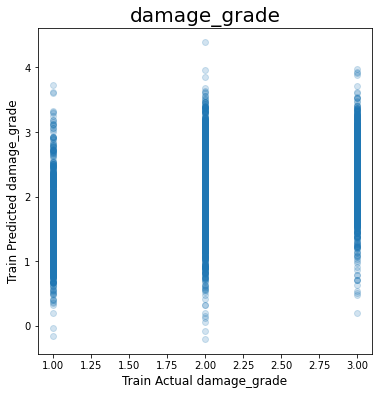

In [24]:
from sklearn.model_selection import KFold

for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params, verbose=500)
    
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title(target[i],fontsize=20)
    ax.set_ylabel('Train Predicted '+target[i],fontsize=12)
    ax.set_xlabel('Train Actual '+target[i],fontsize=12)
    ax.scatter(y,oof,alpha=0.2)

##### Visualize Importance

In [25]:
import seaborn as sns

In [26]:
def visualize_importance(models, feat_train_df):

    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    
    order0=order[0:10]
    print(order0.tolist())
    
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.barplot(data=feature_importance_df, x='feature_importance', y='column', order=order, ax=ax, palette='viridis')
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature')
    ax.set_title('Feature Importance')
    ax.tick_params(axis='x', rotation=0)
    ax.grid()
    
    fig.tight_layout()
    
    return fig, ax


In [27]:
# ! pip install --upgrade seaborn

C:\Users\USER\AppData\Local\Temp/ipykernel_17540/2431205346.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  oof_pred = np.zeros_like(y, dtype=np.float)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 35
[LightGBM] [Info] Start training from score 2.140938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

C:\Users\USER\AppData\Local\Temp/ipykernel_17540/1882378735.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='feature_importance', y='column', order=order, ax=ax, palette='viridis')


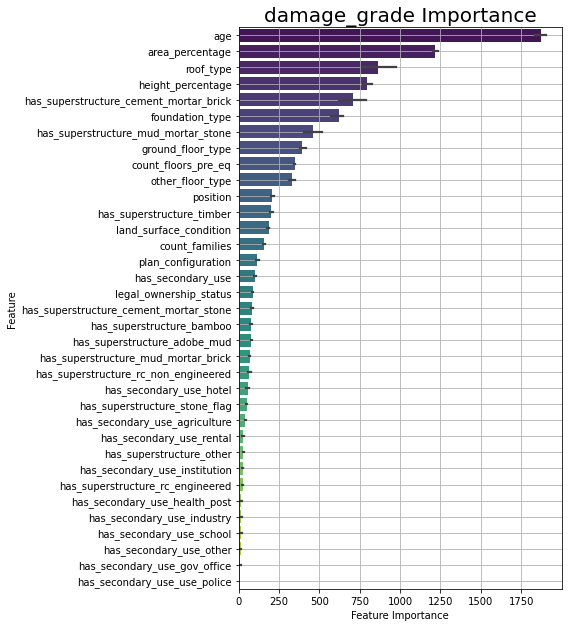

In [30]:
for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params, verbose=500)
    fig, ax = visualize_importance(models, train_feat_df)
    ax.set_title(target[i]+' Importance',fontsize=20)

In [29]:
df

count_floors_pre_eq  age  area_percentage  height_percentage  \
0                       3    0               11                  4   
1                       1    3               11                  9   
2                       2    0               12                  6   
3                       1    0               11                  3   
4                       2    4               25                 10   
...                   ...  ...              ...                ...   
3995                    2   36               12                  4   
3996                    1   16                6                  2   
3997                    2    1                7                  5   
3998                    2    0                7                  5   
3999                    3    0                6                  6   

      land_surface_condition  foundation_type  roof_type  ground_floor_type  \
0                          1                2          2                  0   
1                          2                1          2                  2   
2                          2                1          2                  2   
3                          1                2          0                  2   
4                          2                1          0                  0   
...                      ...              ...        ...                ...   
3995                       2                2          0                  0   
3996                       2                2          0                  3   
3997                       2                3          0                  0   
3998                       2                2          1                  3   
3999                       2                3          1                  0   

      other_floor_type  position  ...  has_secondary_use_hotel  \
0                    1         2  ...                        0   
1                    2         2  ...                        0   
2                    2         2  ...                        0   
3                    0         2  ...                        0   
4                    3         3  ...                        1   
...                ...       ...  ...                      ...   
3995                 3         2  ...                        0   
3996                 0         2  ...                        0   
3997                 1         2  ...                        0   
3998                 3         2  ...                        0   
3999                 2         3  ...                        0   

      has_secondary_use_rental  has_secondary_use_institution  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   
...                        ...                            ...   
3995                         0                              0   
3996                         0                              0   
3997                         0                              0   
3998                         0                              0   
3999                         0                              0   

      has_secondary_use_school  has_secondary_use_industry  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
3995                         0                           0   
3996                         0                           0   
3997                         0                           0   
3998                  

In [31]:
df.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_off

In [32]:


mapping = {
    1 : 0,
    2 : 1,
    3 : 2}

df["damage_grade"] = df["damage_grade"].map(mapping)

In [33]:
columns_for_model = ['age', 'area_percentage', 'roof_type', 'height_percentage', 'has_superstructure_cement_mortar_brick', 'foundation_type', 
 'has_superstructure_mud_mortar_stone', 'ground_floor_type', 'count_floors_pre_eq', 'other_floor_type','damage_grade']

df2 = df.loc[:, columns_for_model]
df2

age  area_percentage  roof_type  height_percentage  \
0       0               11          2                  4   
1       3               11          2                  9   
2       0               12          2                  6   
3       0               11          0                  3   
4       4               25          0                 10   
...   ...              ...        ...                ...   
3995   36               12          0                  4   
3996   16                6          0                  2   
3997    1                7          0                  5   
3998    0                7          1                  5   
3999    0                6          1                  6   

      has_superstructure_cement_mortar_brick  foundation_type  \
0                                          0                2   
1                                          1                1   
2                                          0                1   
3                                          0                2   
4                                          1                1   
...                                      ...              ...   
3995                                       0                2   
3996                                       0                2   
3997                                       0                3   
3998                                       0                2   
3999                                       0                3   

      has_superstructure_mud_mortar_stone  ground_floor_type  \
0                                       1                  0   
1                                       0                  2   
2                                       0                  2   
3                                       1                  2   
4                                       0                  0   
...                                   ...                ...   
3995                                    1                  0   
3996                                    0                  3   
3997                                    1                  0   
3998                                    1                  3   
3999                                    0                  0   

      count_floors_pre_eq  other_floor_type  damage_grade  
0                       3                 1             1  
1                       1                 2             0  
2                       2                 2             0  
3                       1                 0             2  
4                       2                 3             0  
...                   ...               ...           ...  
3995                    2                 3             1  
3996                    1                 0             1  
3997                    2                 1             0  
3998                    2                 3             1  
3999                    3                 2             0  

[4000 rows x 11 columns]

##### Model Development

In [34]:
X = df2.drop('damage_grade', axis= 1)
Y = df2['damage_grade']

In [35]:
Y

0       1
1       0
2       0
3       2
4       0
       ..
3995    1
3996    1
3997    0
3998    1
3999    0
Name: damage_grade, Length: 4000, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [37]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [38]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [39]:
from sklearn.metrics import f1_score

def train_classifier(clf, X, Y):
    clf.fit(X, Y)
    y_pred = clf.predict(X)
    f1 = f1_score(Y, y_pred, average='macro')
    
    return f1

In [40]:
f1_scores = []

for name,clf in clfs.items():
    
    scores = train_classifier(clf, X,Y)
    
    print("For ",name)
    print("F1_score - ",scores)
    
    f1_scores.append(scores)

For  SVC
F1_score -  0.21983914209115282
For  KN
F1_score -  0.6588141019416806
For  NB
F1_score -  0.41757904666100104
For  DT
F1_score -  0.5353082061378555
For  LR
F1_score -  0.4832800976082865
For  RF
F1_score -  0.9592945867118757
For  AdaBoost
F1_score -  0.540028412510677
For  BgC
F1_score -  0.9586862944632712
For  ETC
F1_score -  0.9591678461879894
For  GBDT
F1_score -  0.5499457745018798
For  xgb
F1_score -  0.7583941630347887


In [41]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'F1_scores':f1_scores,}).sort_values('F1_scores',ascending=False)
performance_df

Algorithm  F1_scores
5         RF   0.959295
8        ETC   0.959168
7        BgC   0.958686
10       xgb   0.758394
1         KN   0.658814
9       GBDT   0.549946
6   AdaBoost   0.540028
3         DT   0.535308
4         LR   0.483280
2         NB   0.417579
0        SVC   0.219839

In [42]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

Algorithm   variable     value
0         RF  F1_scores  0.959295
1        ETC  F1_scores  0.959168
2        BgC  F1_scores  0.958686
3        xgb  F1_scores  0.758394
4         KN  F1_scores  0.658814
5       GBDT  F1_scores  0.549946
6   AdaBoost  F1_scores  0.540028
7         DT  F1_scores  0.535308
8         LR  F1_scores  0.483280
9         NB  F1_scores  0.417579
10       SVC  F1_scores  0.219839

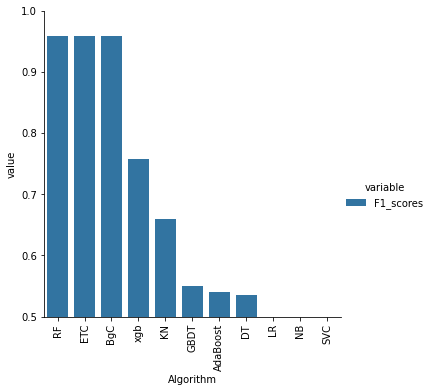

In [43]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [45]:
voting = VotingClassifier(estimators=[('et', etc), ('RF', rfc), ('BgC', bc)],voting='hard')

In [46]:
voting.fit(X,Y)

VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('BgC',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2))])

In [49]:
train_classifier(voting,X,Y)

0.9595422788465234

##### Model Testing

In [50]:
test_data = pd.read_csv('test.csv')
test_data

building_id  count_floors_pre_eq  age  area_percentage  \
0              0                    1    3                8   
1              1                    1    1               10   
2              2                    2   16                8   
3              3                    3   37                5   
4              4                    1    5                5   
..           ...                  ...  ...              ...   
995          995                    2    3               17   
996          996                    2    5                3   
997          997                    2   29                7   
998          998                    1    2                6   
999          999                    2   11                9   

     height_percentage land_surface_condition foundation_type roof_type  \
0                    3                      t               r         q   
1                    3                      t               i         x   
2                   10                      t               i         x   
3                    5                      o               r         n   
4                    3                      t               u         q   
..                 ...                    ...             ...       ...   
995                  4                      t               u         q   
996                  4                      t               r         q   
997                  5                      t               r         n   
998                  2                      t               w         n   
999                  4                      t               u         n   

    ground_floor_type other_floor_type  ... has_secondary_use_agriculture  \
0                   f                j  ...                             0   
1                   x                j  ...                             0   
2                   v                s  ...                             0   
3                   f                q  ...                             0   
4                   f                j  ...                             0   
..                ...              ...  ...                           ...   
995                 f                j  ...                             0   
996                 f                q  ...                             1   
997                 f                q  ...                             0   
998                 f                j  ...                             0   
999                 f                q  ...                             0   

    has_secondary_use_hotel  has_secondary_use_rental  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         1                         0   
..                      ...                       ...   
995                       0                         0   
996                       0                         0   
997                       0                         0   
998                       0                         0   
999                       0                         0   

     has_secondary_use_institution  has_secondary_use_school  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   
..                             ...                       ...   
995                              0                         0   
996                              0                         0   
997                              0                         0   
998                              0                         0   
999                              

In [53]:
def labelencoderr(test_data):
    for a in test_data.columns:
        if test_data[a].dtype=='object': 
            test_data[a] = test_data[a].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(test_data[a].values))
            test_data[a] = lbl.transform(test_data[a].values)
    return test_data

In [54]:
test_data=labelencoderr(test_data)

In [55]:
test_data.dtypes

building_id                               int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int32
foundation_type                           int32
roof_type                                 int32
ground_floor_type                         int32
other_floor_type                          int32
position                                  int32
plan_configuration                        int32
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered    

In [57]:
columns_for_model = ['age', 'area_percentage', 'roof_type', 'height_percentage', 'has_superstructure_cement_mortar_brick', 'foundation_type', 
 'has_superstructure_mud_mortar_stone', 'ground_floor_type', 'count_floors_pre_eq', 'other_floor_type']

test_data = test_data.loc[:, columns_for_model]
test_data

age  area_percentage  roof_type  height_percentage  \
0      3                8          1                  3   
1      1               10          2                  3   
2     16                8          2                 10   
3     37                5          0                  5   
4      5                5          1                  3   
..   ...              ...        ...                ...   
995    3               17          1                  4   
996    5                3          1                  4   
997   29                7          0                  5   
998    2                6          0                  2   
999   11                9          0                  4   

     has_superstructure_cement_mortar_brick  foundation_type  \
0                                         0                2   
1                                         1                1   
2                                         0                1   
3                                         0                2   
4                                         0                3   
..                                      ...              ...   
995                                       0                3   
996                                       0                2   
997                                       0                2   
998                                       1                4   
999                                       1                3   

     has_superstructure_mud_mortar_stone  ground_floor_type  \
0                                      1                  0   
1                                      0                  3   
2                                      0                  2   
3                                      1                  0   
4                                      1                  0   
..                                   ...                ...   
995                                    0                  0   
996                                    1                  0   
997                                    1                  0   
998                                    0                  0   
999                                    1                  0   

     count_floors_pre_eq  other_floor_type  
0                      1                 0  
1                      1                 0  
2                      2                 2  
3                      3                 1  
4                      1                 0  
..                   ...               ...  
995                    2                 0  
996                    2                 1  
997                    2                 1  
998                    1                 0  
999                    2                 1  

[1000 rows x 10 columns]

In [63]:
predictions = voting.predict(test_data)
predictions

array([1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0,
       2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2,
       2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2,
       1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1,
       2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1,
       0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2,

In [66]:
data = pd.DataFrame(predictions, columns=["damage_grade"])
data
# Save predictions to a CSV file
#predictions_df.to_csv("predictions.csv", index=False)

damage_grade
0               1
1               0
2               0
3               1
4               1
..            ...
995             1
996             2
997             0
998             1
999             1

[1000 rows x 1 columns]

In [67]:
mapping = {
    0 : 1,
    1 : 2,
    2 : 3}

data["damage_grade"] = data["damage_grade"].map(mapping)

In [68]:
data

damage_grade
0               2
1               1
2               1
3               2
4               2
..            ...
995             2
996             3
997             1
998             2
999             2

[1000 rows x 1 columns]

In [69]:
data.to_csv("predictions.csv", index=False)